In [4]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

В scipy.stats для случайной величины используется классы rv_continious/rv_discrete, которые наследуются для создания других распределений. Поэтому для каждого распределения используются одинаковые функция для подсчета функции распределения, плотности распределения, вычисления моментов.

### Дискретные распределения

Для того чтобы сгенеровать дискретную случайную величину, можно воспользоваться numpy.random.choice:

In [6]:
sample = np.array([1, 4, -1, 0])
probas = [0.15, 0.5, 0.16, 0.19]
np.random.choice(sample, 10, p=probas)

array([1, 0, 4, 1, 4, 0, 4, 1, 0, 4])

Она работает следующим образом - мы выбираем, какое количество элементов будет в выборке,и в зависимости от заданной вероятности, в выборку добавляются значения. Например, у значения 4 вероятность появления 0.5 - в итоговой выборке встречается наиболее часто.

Теперь переходим к генерации распределений конкретного вида и начнем с дикретных:

### Распределение Бернулли

In [19]:
p = 0.3
mean, var, skew, kurt = stats.bernoulli.stats(p, moments='mvsk')

In [22]:
skew

array(0.87287156)

### Биномиальное распределение

Биномиальное распределение это обобщение распределния Бернулли - только здесь рассматривается успех или неудача в n экспериментах, поэтому для генерации выборки нужно задать три параметра : вероятность успеха, общее количество экпериментов и количество событий с успешным исходом.

In [7]:
binomial = stats.binom.rvs(n=10, p=0.5, size = 1000)

Функция распределения

In [58]:
stats.binom.cdf(k=5,        # Probability of k = 5 successes or less
                n=10,       # With 10 flips
                p=0.8)      # And success probability 0.8

0.032793497599999964

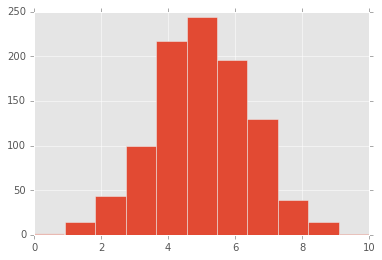

In [129]:
plt.hist(binomial,bins=11);

Распределение для вероятности p = 0.5 симметричное, но если изменить вероятность успеха, то получится смещенное распределение

In [130]:
binomial_skew = stats.binom.rvs(n=10, p=0.3, size = 10000)

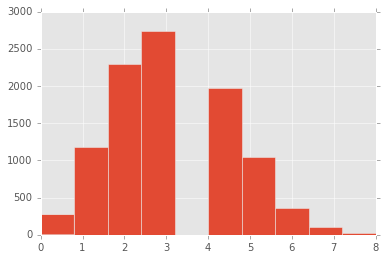

In [131]:
plt.hist(binomial_skew);

In [1]:
rv_binom = stats.binom(n=10, p=0.5)
X = np.linspace(0,20,20)
cdf = rv_binom.cdf(X)
plt.step(X, cdf)

plt.ylabel('F(x)');
plt.xlabel('x');
plt.title(u'Функция распреледения')

NameError: name 'stats' is not defined

Так как это дискрентное распределение, то вместо плотности распределения используется функция вероятности

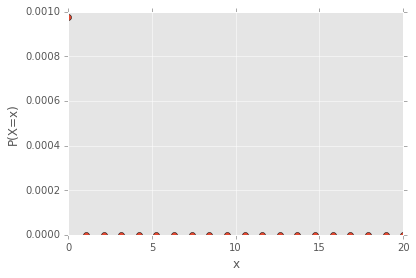

In [134]:
x = np.linspace(0,20,20)
pmf = rv_binom.pmf(x)
plt.plot(x, pmf, 'o')
plt.ylabel('P(X=x)')
plt.xlabel('x')

### Непрерывное распределение

Непрерывное распределение на отрезке \[a,b\]

In [2]:
a = 1
b = 5

In [3]:
rv_uniform = stats.uniform(a, b - a)
rv_uniform.rvs(12)

NameError: name 'stats' is not defined

Функция распределения - в качестве входных параметров можно передавать как одно значение, так и numpy.array

In [90]:
rv_uniform.cdf(2)

0.25

In [8]:
X = np.linspace(a - 2,b + 2,100)
cdf = rv_uniform.cdf(X)
plt.plot(X, cdf)

plt.ylabel('F(x)')
plt.xlabel('x')
plt.ylim([0,1.5]);
plt.title(u'Cumulative distribution function for uniform');

NameError: name 'rv_uniform' is not defined

Аналогично для плотности вероятности

Плотность вероятности

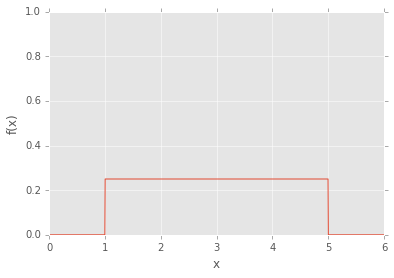

In [144]:
X = np.linspace(a-2 , b + 2, 1000)
pdf = rv_uniform.pdf(X)
plt.plot(X, pdf)

plt.ylabel('f(x)')
plt.xlabel('x')
#plt.ylim([0,1]);
plt.xlim([4, 12]);

### Распределение Пуассона

In [101]:
?stats.poisson

In [105]:
rv_poisson = stats.poisson(mu=5)

In [104]:
rv_poisson.rvs(190)

array([2, 1, 0, 2, 0, 1, 2, 1, 1, 1, 2, 0, 1, 0, 1, 2, 0, 2, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 2, 3, 0, 1, 0, 0, 1, 0, 0, 1, 0, 2,
       0, 1, 1, 0, 2, 2, 0, 1, 2, 1, 1, 1, 1, 2, 0, 0, 0, 1, 1, 2, 4, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 2, 1, 2, 1, 0, 4, 1, 0, 1, 0, 1, 4,
       0, 2, 3, 1, 2, 2, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 4, 2, 1, 0, 0, 1,
       0, 0, 0, 1, 3, 1, 3, 2, 0, 1, 1, 1, 2, 1, 0, 5, 3, 3, 1, 0, 0, 1,
       0, 0, 2, 1, 5, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 3, 0, 2, 1, 1,
       1, 2, 1, 1, 1, 2, 0, 1, 1, 3, 2, 0, 1, 1, 0, 2, 0, 4, 0, 1, 2, 1,
       3, 3, 1, 0, 1, 1, 0, 1, 1, 0, 1, 2, 0, 0])

Посмотрим как изменяется функция распределения при изменении параметра \lambda

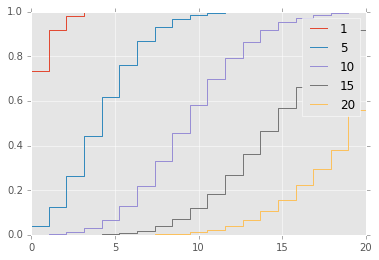

In [145]:
lammbdas = [1,5,10,15,20]
for l in lammbdas:
    rv_poisson = stats.poisson(l)
    x = np.linspace(0,20,20)
    cdf = rv_poisson.cdf(x)
    plt.step(x, cdf, label=l)
plt.legend()

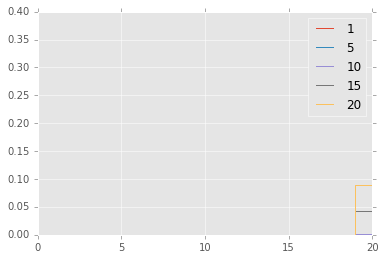

In [146]:
lammbdas = [1,5,10,15,20]
for l in lammbdas:
    rv_poisson = stats.poisson(l)
    x = np.linspace(0,20,20)
    cdf = rv_poisson.pmf(x)
    plt.step(x, cdf, label=l)
plt.legend()

### Нормальное распределение

loc - мат ожидание, scale - среднеквадратичное отклонение

In [147]:
mu = 2.0
sigma = 0.5


rv_norm = stats.norm(loc=mu, scale=sigma)

# сгенерируем 10 значений
rv_norm.rvs(size=8)

array([2.80198235, 0.82891889, 2.14795608, 1.14489587, 2.6943417 ,
       1.71877978, 2.47107129, 2.44557242])

Давайте теперь нарисуем функцию распределения:

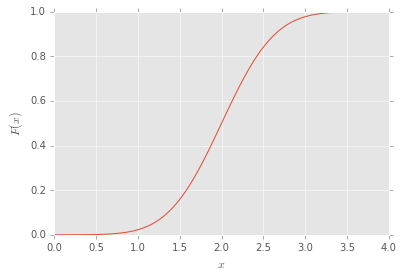

In [148]:
x = np.linspace(0,4,100)
cdf = rv_norm.cdf(x) # функция может принимать и вектор (x)
plt.plot(x, cdf)
plt.ylabel('$F(x)$')
plt.xlabel('$x$')

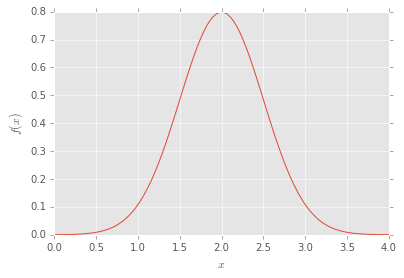

In [149]:
x = np.linspace(0,4,100)
pdf = rv_norm.pdf(x)
plt.plot(x, pdf)

plt.ylabel('f(x)');
plt.xlabel('x');

In [150]:
mean, var, skew, kurt = stats.uniform.stats(moments='mvsk')

In [151]:
mean, var, skew, kurt

(array(0.5), array(0.08333333), array(0.), array(-1.2))

Тажке можно вычислить так называемые моменты - среднее, среднеквадратичное отклонение, смещенность распределения и 

kurt — степень остроты пика распределения случайной величины.

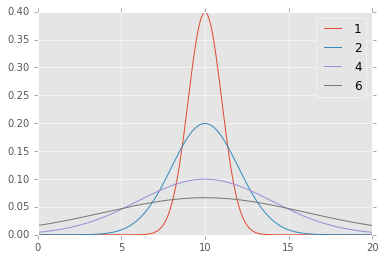

In [157]:
means = [1,5,10]
mu = 10
sigmas = [1, 2, 4, 6]
for sigma in sigmas:
    rv_norm = stats.norm(loc=mu, scale=sigma)
    x = np.linspace(0,20,200)
    cdf = rv_norm.pdf(x)
    plt.plot(x, cdf, label=sigma)
plt.legend()